In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(anndataR))
suppressMessages(library(ComplexHeatmap))
library(abind)

In [2]:
out_dir <- "../../results/05_fibroblast/08_colocalization"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [3]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05',
               #'SSc4733', 
                 'SSc4994', 
                 'SSc5380', 
                 #'SSc5722',
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [4]:
for(sample in sample_list){
    obj_fib <- readRDS(glue::glue("../../results/05_fibroblast/06_cell_state_score/{sample}.rds"))
    obj_mac <- readRDS(glue::glue("../../results/07_marchphages/04_cell_state_score/{sample}.rds"))
    
    df1 <- obj_fib@meta.data %>%
            subset(select = c('Fib1', 'Fib10', 'Fib2', 'Fib3', 'Fib4', 'Fib5', 'Fib6', 'Fib7', 'Fib8', 'Fib9'))

    df2 <- obj_mac@meta.data %>%
            subset(select = c('Antigen-presenting', 'Phagocytic', 'Pro-inflammatory'))
    
    df_cor <- as.data.frame(cor(df2, df1, method="spearman"))
    
    write.csv(df_cor, glue::glue("{out_dir}/{sample}.csv"))
}

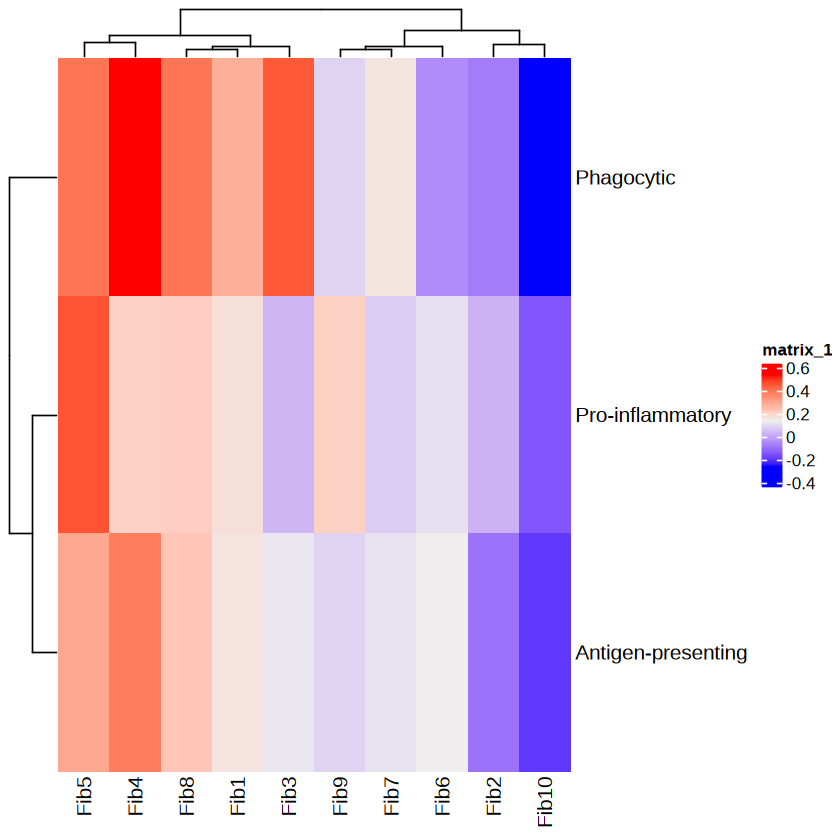

In [5]:
Heatmap(as.matrix(df_cor))

In [6]:
df_cor_list <- lapply(sample_list, function(sample){
    df_cor = read.csv(glue::glue("{out_dir}/{sample}.csv"), row.names = 1)
    return(df_cor)
})

array_3d <- abind(lapply(df_cor_list, function(df) as.matrix(df)), along = 3)
mean_matrix <- apply(array_3d, c(1, 2), mean)

In [7]:
mean_matrix

,Fib1,Fib10,Fib2,Fib3,Fib4,Fib5,Fib6,Fib7,Fib8,Fib9
Antigen-presenting,0.1242159461,-0.06688155,-0.02382668,0.2644763,0.4389376,0.2556383,0.10431644,0.1202776,0.18604383,0.07364243
Phagocytic,0.4094731224,-0.16074989,0.11682920,0.5260602,0.5678252,0.2620063,0.12383633,0.1653434,0.49556115,0.23679605
Pro-inflammatory,0.0003001766,0.02115498,-0.03771669,0.1071598,0.1984487,0.3870058,-0.03490428,0.0356773,0.01880603,0.05554273


In [8]:
options(repr.plot.height = 5, repr.plot.width = 6)

ht <- Heatmap(as.matrix(mean_matrix),
              name = 'Correlation',
              rect_gp = gpar(col = "black", lwd = 0.5),
              col = ArchR::paletteContinuous("blueYellow", n = 100),
             cluster_columns = TRUE,
             cluster_rows = TRUE,
             clustering_method_rows = 'ward.D2',
             clustering_method_columns = 'ward.D2'
             )

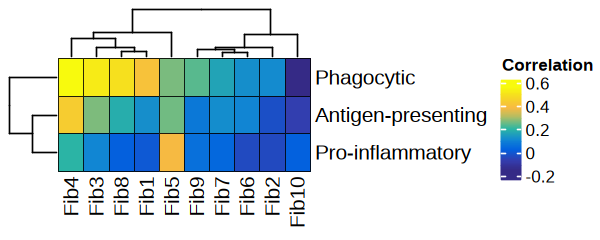

In [9]:
options(repr.plot.height = 2, repr.plot.width = 5)

draw(ht)

In [10]:
write.csv(mean_matrix, "../../results/05_fibroblast/08_colocalization/correlation.csv")